In [1]:
%matplotlib inline
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as LA

In [2]:
def multivariate_normal(X, mu=np.array([[0, 0]]), sig=np.array([[1, 0.8], [0.8, 1]])):
    sqrt_det_2pi_sig = np.sqrt(2 * np.pi * LA.det(sig))
    sig_inv = LA.inv(sig)
    X = X[:, None, :] - mu[None, :, :]
    return np.exp(-np.matmul(np.matmul(X, np.expand_dims(sig_inv, 0)), (X.transpose(0, 2, 1)))/2)/sqrt_det_2pi_sig

In [3]:
x = np.linspace(-3, 3, 1000)
X = np.array(np.meshgrid(x, x)).transpose(1, 2, 0)
X = np.reshape(X, [X.shape[0] * X.shape[1], -1])
z = multivariate_normal(X)

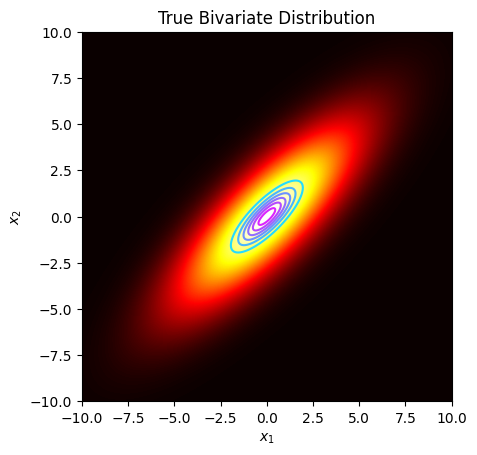

In [4]:
plt.imshow(z.squeeze().reshape([x.shape[0], -1]), extent=[-10, 10, -10, 10], cmap='hot', origin='lower')
plt.contour(x, x, z.squeeze().reshape([x.shape[0], -1]), cmap='cool')
plt.title('True Bivariate Distribution')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

In [5]:
x0 = [0, 0]
xt = x0
b = 0.8
samples = []
for i in range(100000):
    x1_t = np.random.normal(b*xt[1], 1-b*b)
    x2_t = np.random.normal(b*x1_t, 1-b*b)
    xt = [x1_t, x2_t]
    samples.append(xt)
burn_in = 1000
samples = np.array(samples[burn_in:])

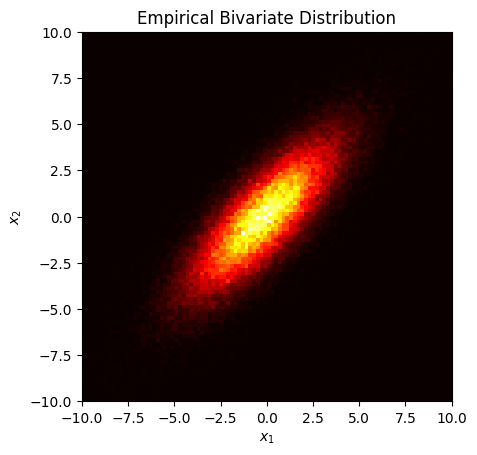

In [6]:
im, x_, y_ = np.histogram2d(samples[:, 0], samples[:, 1], bins=100)
plt.imshow(im, extent=[-10, 10, -10, 10], cmap='hot', origin='lower', interpolation='nearest')
plt.title('Empirical Bivariate Distribution')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

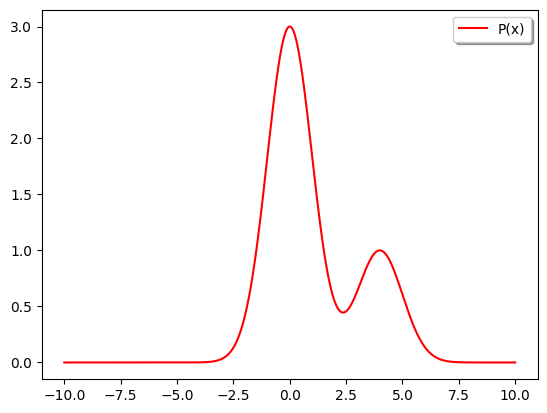

In [7]:
#Importance Sampling

%matplotlib inline
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
P = lambda x: 3 * np.exp(-x*x/2) + np.exp(-(x - 4)**2/2)
Z = 10.0261955464
x_vals = np.linspace(-10, 10, 1000)
y_vals = P(x_vals)
plt.figure(1)
plt.plot(x_vals, y_vals, 'r', label='P(x)')
plt.legend(loc='upper right', shadow=True)
plt.show()

In [8]:
f_x = lambda x: x
g_x = lambda x: np.sin(x)
true_expected_fx = 10.02686647165
true_expected_gx = -1.15088010640
a, b = -4, 8
uniform_prob = 1./(b - a)

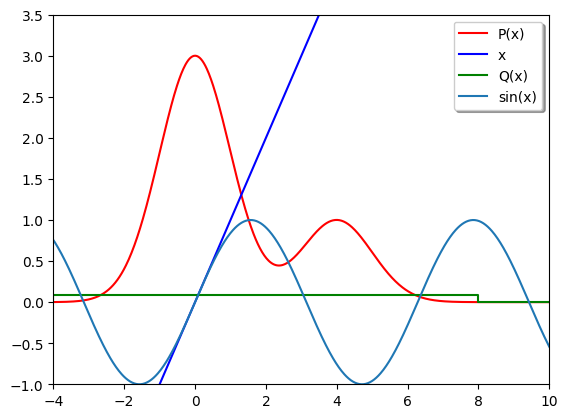

In [9]:
plt.figure(2)
plt.plot(x_vals, y_vals, 'r', label='P(x)')
plt.plot(x_vals, f_x(x_vals), 'b', label='x')
plt.plot([-10, a, a, b, b, 10], [0, 0, uniform_prob, uniform_prob, 0, 0], 'g', label='Q(x)')
plt.plot(x_vals, np.sin(x_vals), label='sin(x)')
plt.xlim(-4, 10)
plt.ylim(-1, 3.5)
plt.legend(loc='upper right', shadow=True)
plt.show()

In [10]:
expected_f_x = 0.
expected_g_x = 0.
n_samples = 100000
den = 0.
for i in range(n_samples):
    sample = np.random.uniform(a, b)
    importance = P(sample) / uniform_prob
    den += importance
    expected_f_x += importance * f_x(sample)
    expected_g_x += importance * g_x(sample)
expected_f_x /= den
expected_g_x /= den
expected_f_x *= Z
expected_g_x *= Z
print('E[f(x)] = %.5f, Error = %.5f' % (expected_f_x, abs(expected_f_x - true_expected_fx)))
print('E[g(x)] = %.5f, Error = %.5f' % (expected_g_x, abs(expected_g_x - true_expected_gx)))

E[f(x)] = 9.97557, Error = 0.05130
E[g(x)] = -1.16256, Error = 0.01168
